In [25]:
import numpy as np
import rebound 
import random
import matplotlib.pyplot as plt
from tkinter import *

random.seed(1)

sim = rebound.Simulation()
sim.units = ('Sidereal_yr', 'AU', 'Msun')
#sim.units = ('Yr', 'AU', 'Msun')

radius = 0.005
sim.add(m=0.7, r=radius)


# sim.add(m=0.00001,x=0.027781409233055013, y=0.0, z=0.0, vx=0.0, vy=31.56175213851367, vz=0.0)
# sim.add(m=0.00001, x=0.01389070461652751*1.0, y=0.0240594061487572, z=0.0, vx=-27.333279139900668*1.01, vy=15.780876069256838*0.99, vz=0.0)

sim.add(m=0.00001,a=0.027820755167564368,e=0.0014142655104929561,omega = 0.0, inc = 0.0)
sim.add(m=0.00001,a=0.028104204340703643,e=0.01436393703840509,omega = 1.6991961363967472,inc = 0.0)

sim.status()

sim.integrator = "mercurius"
sim.ri_mercurius.hillfac = 3
#sim.dt = min([o.P for o in sim.calculate_orbits()]) * 0.0001 # 5% timestep
sim.dt = min([o.P for o in sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)]) * 0.001 # 5% timestep
#os = sim.calculate_orbits(primary=sim.particles[0])
os = sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)  # set helio-centric orbit
print('period 1 (day) = ', os[0].P*365.24, os[0].a, os[0].d, os[0].v)
print('period 2 (day) = ', os[1].P*365.24, os[1].a, os[1].d, os[1].v)

per = 2.02/365.24
#for o in enumerate(os):
#    print(o)
print('sim_dt = ', sim.dt*365.24)
#sim.ri_mercurius.L = "C4"

#times = np.arange(0, 1, step=0.01)*1*2*np.pi
times = np.arange(0, 10, step=0.001)*1*per   #每个周期记录数据的点的间隔由step决定，如果step=0.01,那么每隔0.01个周期记录一个点
#print(times)
#print(sim.N)
Es = np.zeros(len(times))
As = np.zeros((len(times),sim.N-1))
Eccs = np.zeros((len(times),sim.N-1))
incs = np.zeros((len(times),sim.N-1))
X0 = np.zeros((len(times)))
X1 = np.zeros((len(times)))
X2 = np.zeros((len(times)))
Y0 = np.zeros((len(times)))
Y1 = np.zeros((len(times)))
Y2 = np.zeros((len(times)))
Z0 = np.zeros((len(times)))
Z1 = np.zeros((len(times)))
Z2 = np.zeros((len(times)))
record_time = np.zeros((len(times)))

for j, time in enumerate(times):
    #print(j,time)
    sim.integrate(time)
    Es[j] = sim.calculate_energy()
    os = sim.calculate_orbits()
    record_time[j] =  time
    for i,o in enumerate(os):
        #print(i)
        As[j,i] = o.a
        Eccs[j,i] = o.e
        incs[j,i] = o.inc
        X0[j] = sim.particles[0].x
        Y0[j] = sim.particles[0].y
        Z0[j] = sim.particles[0].z
        X1[j] = sim.particles[1].x
        Y1[j] = sim.particles[1].y
        Z1[j] = sim.particles[1].z
        X2[j] = sim.particles[2].x
        Y2[j] = sim.particles[2].y
        Z2[j] = sim.particles[2].z
#perform_output(sim)

distance1 = ((Y1-Y0)**2.0+(Z1-Z0)**2.0)**0.5
k1 =  distance1/radius

distance2 = ((Y2-Y0)**2.0+(Z2-Z0)**2.0)**0.5
k2 = distance2/radius
      
fig, axs = plt.subplots(1,3,figsize=(15,4))
axs[0].set_yscale("log")
axs[0].set_ylabel("Energy error")
#axs[1].set_ylim([0.01,20])
#axs[1].set_yscale("log")
axs[1].set_ylabel("semi-major axis")
#axs[2].set_ylim([1e-6,1])
axs[0].set_yscale("log")
axs[2].set_ylabel("eccentricity")

axs[0].plot(times/(np.pi*2.),np.abs((Es-Es[0])/Es[0]))
for i in range(As.shape[1]):
    axs[1].plot(times/(np.pi*2.),As[:,i])
    axs[2].plot(times/(np.pi*2.),Eccs[:,i])
    
plt.figure()
for i in range(As.shape[1]):
    plt.plot(times/(np.pi*2.), incs[:,i]/np.pi*180.0)
plt.ylabel('Inclination Angle (degree)')
plt.show()

# #fig = rebound.OrbitPlot(sim, xlim=[-1,1],ylim=[-1,1])
# fig = rebound.OrbitPlot(sim)

# fig = rebound.OrbitPlot(sim,slices=0.5,xlim=[-2.,2],ylim=[-2.,2])
# sim.status()
# plt.figure()
# plt.plot(record_time*365.24, k1) # when k1 is between [0,1], and x1-x0 > 0, 
#                                  # being transit. 0 corresponsing to transit center
# plt.plot(record_time*365.24, k2)
# #plt.plot(record_time*365.24, (X1-X0)/np.max(X1-X0))
# plt.xlabel('time (day)')
# plt.ylim(-1,1)
# plt.show()

# plt.figure()
# # plt.plot(X2-X0, Y2-Y0)
# # plt.plot(X1-X0, Y1-Y0)
# #plt.xlabel('time (day)')
# #plt.ylim(-1,1)
# plt.show()

---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	Jun 29 2022 01:55:10
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x298cf2340, m=0.7 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x298cf22c0, m=1e-05 x=0.027781409233055013 y=0.0 z=0.0 vx=0.0 vy=31.56175213851367 vz=0.0>
<rebound.particle.Particle object at 0x298cf2340, m=1e-05 x=-0.0035465792889616517 y=0.02747248841766554 z=0.0 vx=-31.549867203625112 vy=-4.07295613199793 vz=0.0>
---------------------------------
period 1 (day) =  2.0257237505738837 0.027820755167564368 0.027781409233055013 31.56175213851367
period 2 (day) =  2.0567831673508676 0.028104407933332513 0.02770046650350241 31.81168169430153
sim_dt =  0.002025723750573884


/var/folders/4g/jskm2hn143v97kbtf2dmm1dc0000gn/T/ipykernel_4242/1430069352.py:106: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [22]:
!conda install tk

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::requests==2.27.1=pyhd8ed1ab_0
  - conda-forge/osx-arm64::brotlipy==0.7.0=py39hb18efdd_1004
  - conda-forge/osx-arm64::setuptools==62.3.2=py39h2804cbe_0
  - conda-forge/noarch::six==1.16.0=pyh6c4a22f_0
  - conda-forge/noarch::charset-normalizer==2.0.12=pyhd8ed1ab_0
  - conda-forge/osx-arm64::python==3.9.13=hc596b02_0_cpython
  - conda-forge/osx-arm64::sqlite==3.38.5=h40dfcc0_0
  - conda-forge/noarch::urllib3==1.26.9=pyhd8ed1ab_0
  - conda-forge/noarch::wheel==0.37.1=pyhd8ed1ab_0
  - conda-forge/osx-arm64::readline==8.1=hedafd6a_0
  - conda-forge/osx-arm64::ruamel_yaml==0.15.80=py39h9eb174b_1007
  - conda-forge/noarch::colorama==0.4.4=pyh9f0ad1d_0
  - conda-forge/osx-arm64::cffi==1.15.0=py39h52b1de0_0
  - conda-forge/noarch::pyopenssl==22.0.0=pyhd8ed1ab_0
  - conda-forge/noarch::tqdm==4.64.0=pyhd8ed1ab_0
  - conda-

In [17]:
import numpy as np
import rebound 
import random
import matplotlib.pyplot as plt
import math

random.seed(1)

sim = rebound.Simulation()
sim.units = ('Sidereal_yr', 'AU', 'Msun')
#sim.units = ('Yr', 'AU', 'Msun')

radius = 0.005
sim.add(m=0.7, r=radius)
r = 0.1*radius

sim.add(m=0.00001,x=0.027781409233055013, y=0.0, z=0.0, vx=0.0, vy=31.56175213851367, vz=0.0)
sim.add(m=0.00001, x=0.01389070461652751*1.0, y=0.0240594061487572, z=0.0, vx=-27.333279139900668*1.01, vy=15.780876069256838*0.99, vz=0.0)
#print(sim.particles[1].inc)
sim.status()

sim.integrator = "mercurius"
sim.ri_mercurius.hillfac = 3
#sim.dt = min([o.P for o in sim.calculate_orbits()]) * 0.0001 # 5% timestep
sim.dt = min([o.P for o in sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)]) * 0.001 # 5% timestep
#os = sim.calculate_orbits(primary=sim.particles[0])
os = sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)  # set helio-centric orbit
print('period 1 (day) = ', os[0].P*365.24, os[0].a, os[0].d, os[0].v)
print('period 2 (day) = ', os[1].P*365.24, os[1].a, os[1].d, os[1].v)

per = 2.02/365.24
#for o in enumerate(os):
#    print(o)
print('sim_dt = ', sim.dt*365.24)
#sim.ri_mercurius.L = "C4"

#times = np.arange(0, 1, step=0.01)*1*2*np.pi
times = np.arange(0, 100, step=0.01)*1*per   #每个周期记录数据的点的间隔由step决定，如果step=0.01,那么每隔0.01个周期记录一个点
#print(times)
#print(sim.N)
Es = np.zeros(len(times))
As = np.zeros((len(times),sim.N-1))
Eccs = np.zeros((len(times),sim.N-1))
incs = np.zeros((len(times),sim.N-1))
X0 = np.zeros((len(times)))
X1 = np.zeros((len(times)))
X2 = np.zeros((len(times)))
Y0 = np.zeros((len(times)))
Y1 = np.zeros((len(times)))
Y2 = np.zeros((len(times)))
Z0 = np.zeros((len(times)))
Z1 = np.zeros((len(times)))
Z2 = np.zeros((len(times)))
record_time = np.zeros((len(times)))

for j, time in enumerate(times):
    #print(j,time)
    sim.integrate(time)
    Es[j] = sim.calculate_energy()
    os = sim.calculate_orbits()
    record_time[j] =  time
    for i,o in enumerate(os):
        #print(i)
        As[j,i] = o.a
        Eccs[j,i] = o.e
        incs[j,i] = o.inc
        X0[j] = sim.particles[0].x
        Y0[j] = sim.particles[0].y
        Z0[j] = sim.particles[0].z
        X1[j] = sim.particles[1].x
        Y1[j] = sim.particles[1].y
        Z1[j] = sim.particles[1].z
        X2[j] = sim.particles[2].x
        Y2[j] = sim.particles[2].y
        Z2[j] = sim.particles[2].z
#perform_output(sim)

K1 = []
I1 = []
K2 = []
I2 = []
K3 = []
I3 = []
K4 = []
I4 = []
D1 = []
T1 = []
D2 = []
T2 = []

for i in range(0, len(X0)):
    if X1[i] > 0:
        distance1 = ((Y1[i]-Y0[i])**2.0+(Z1[i]-Z0[i])**2.0)**0.5
        if distance1 < radius - r:
            k1 = 1 - r**2/radius**2
            K1.append(k1)
            I1.append(i)
            
        elif distance1 < radius + r:
            #print(2)
            # angle1 = math.acos((radius**2 + distance1**2 - r**2)/(2*distance1*radius))
            # angle2 = math.acos((r**2 + distance1**2 - radius**2)/(2*distance1*r))
            # k1 = radius**2*angle1 + r**2*angle2 - np.sin(angle1)*radius*distance1
            #print(k1)
            k1 = 1 - (radius - distance1)**2/radius**2
            K1.append(k1)
            I1.append(i)
        else:
            k1 = 1
            K1.append(k1)
            I1.append(i)
    else:
        k1 = 1
        K1.append(k1)
        I1.append(i)

for i in range(0, len(X0)):
    if X2[i] > 0:
        distance2 = ((Y2[i]-Y0[i])**2.0+(Z2[i]-Z0[i])**2.0)**0.5
        if distance2 < radius - r:
            k2 = 1 - r**2/radius**2
            K2.append(k2)
            I2.append(i)
            
        elif distance2 < radius + r:
            #print(2)
            # angle1 = math.acos((radius**2 + distance1**2 - r**2)/(2*distance1*radius))
            # angle2 = math.acos((r**2 + distance1**2 - radius**2)/(2*distance1*r))
            # k1 = radius**2*angle1 + r**2*angle2 - np.sin(angle1)*radius*distance1
            #print(k1)
            k2 = 1 - (radius - distance2)**2/radius**2
            K2.append(k2)
            I2.append(i)
            if K2[i] < K2[i-1]:
                D1.append(K2[i])
                T1.append(i)
            if K2[i] > K2[i-1]:
                D2.append(K2[i-1])
                T2.append(i)
        else:
            k2 = 1
            K2.append(k2)
            I2.append(i)
    else:
        k2 = 1
        K2.append(k2)
        I2.append(i)

# for i in range(0, len(X0)):
#     if X2[i] > 0:
#         distance2 = ((Y2[i]-Y0[i])**2.0+(Z2[i]-Z0[i])**2.0)**0.5
#         k2 =  1 - (distance2/radius)**2
#         if k2 < 1:
#             K2.append(k2)
#             I2.append(i)
#         else:
#             k2 = 1.0
#             K2.append(k2)
#             I2.append(i)
#     else:
#         k2 = 1.0
#         K2.append(k2)
#         I2.append(i)

# for i in range(0, len(X0)):
#     if X1[i] > 0:
#         distance3 = ((X1[i]-X0[i])*np.tan(5/360) + Y2[i] - Y0[i])
#         k3 =  distance3/radius
#         if k3 < 1:
#             K3.append(k3)
#             I3.append(i)
#         else:
#             k3 = 1.0
#             K3.append(k3)
#             I3.append(i)
#     else:
#         k3 = 1.0
#         K3.append(k3)
#         I3.append(i)


# distance1 = ((Y1-Y0)**2.0+(Z1-Z0)**2.0)**0.5
# k1 =  distance1/radius

# distance2 = ((Y2-Y0)**2.0+(Z2-Z0)**2.0)**0.5
# k2 = distance2/radius

# distance3 = ((X1-X0)*np.tan(5/360) + Y2 - Y0)
# k3 = distance3/radius

# distance4 = ((X2-X0)*np.tan(5/360) + Y2 - Y0)
# k4 = distance4/radius

# K1 = []
# K2 = []
# K3 = []
# K4 = []


# if k1 < 1:
#     K1.append(k1)

# if k2 < 1:
#     K2.append(k2)

# if k3 < 1:
#     K3.append(k3)

# if k4 < 1:
#     K4.append(k4)

fig, axs = plt.subplots(1,3,figsize=(15,4))
axs[0].set_yscale("log")
axs[0].set_ylabel("Energy error")
#axs[1].set_ylim([0.01,20])
#axs[1].set_yscale("log")
axs[1].set_ylabel("semi-major axis")
#axs[2].set_ylim([1e-6,1])
axs[0].set_yscale("log")
axs[2].set_ylabel("eccentricity")

axs[0].plot(times/(np.pi*2.),np.abs((Es-Es[0])/Es[0]))
for i in range(As.shape[1]):
    axs[1].plot(times/(np.pi*2.),As[:,i])
    axs[2].plot(times/(np.pi*2.),Eccs[:,i])
    
plt.figure()
for i in range(As.shape[1]):
    plt.plot(times/(np.pi*2.), incs[:,i]/np.pi*180.0)
plt.ylabel('Inclination Angle (degree)')
plt.show()

fig = rebound.OrbitPlot(sim, xlim=[-1,1],ylim=[-1,1])
fig = rebound.OrbitPlot(sim)

fig = rebound.OrbitPlot(sim,slices=0.5,xlim=[-2.,2],ylim=[-2.,2])
sim.status()
plt.figure()


# fig = plt.figure(figsize=(50, 5))
# plt.plot(record_time*365.24, K3)
# plt.xlim(0,20)
# plt.plot(record_time*365.24, k4)
# plt.xlabel('time (day)')
# plt.show()
# plt.figure()
# # plt.plot(X2-X0, Y2-Y0)
# # plt.plot(X1-X0, Y1-Y0)
# #plt.xlabel('time (day)')
# #plt.ylim(-1,1)
# plt.show()

---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	Jun 29 2022 01:55:10
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x2980e73c0, m=0.7 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x2980e75c0, m=1e-05 x=0.027781409233055013 y=0.0 z=0.0 vx=0.0 vy=31.56175213851367 vz=0.0>
<rebound.particle.Particle object at 0x2980e73c0, m=1e-05 x=0.01389070461652751 y=0.0240594061487572 z=0.0 vx=-27.606611931299675 vy=15.62306730856427 vz=0.0>
---------------------------------
period 1 (day) =  2.0257237505738837 0.027820755167564368 0.027781409233055013 31.56175213851367
period 2 (day) =  2.0568947083878775 0.028105424007534248 0.027781409233055013 31.72073855466337
sim_dt =  0.002025723750573884
---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	Jun 

/var/folders/4g/jskm2hn143v97kbtf2dmm1dc0000gn/T/ipykernel_4242/436471666.py:231: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


<Figure size 640x480 with 0 Axes>

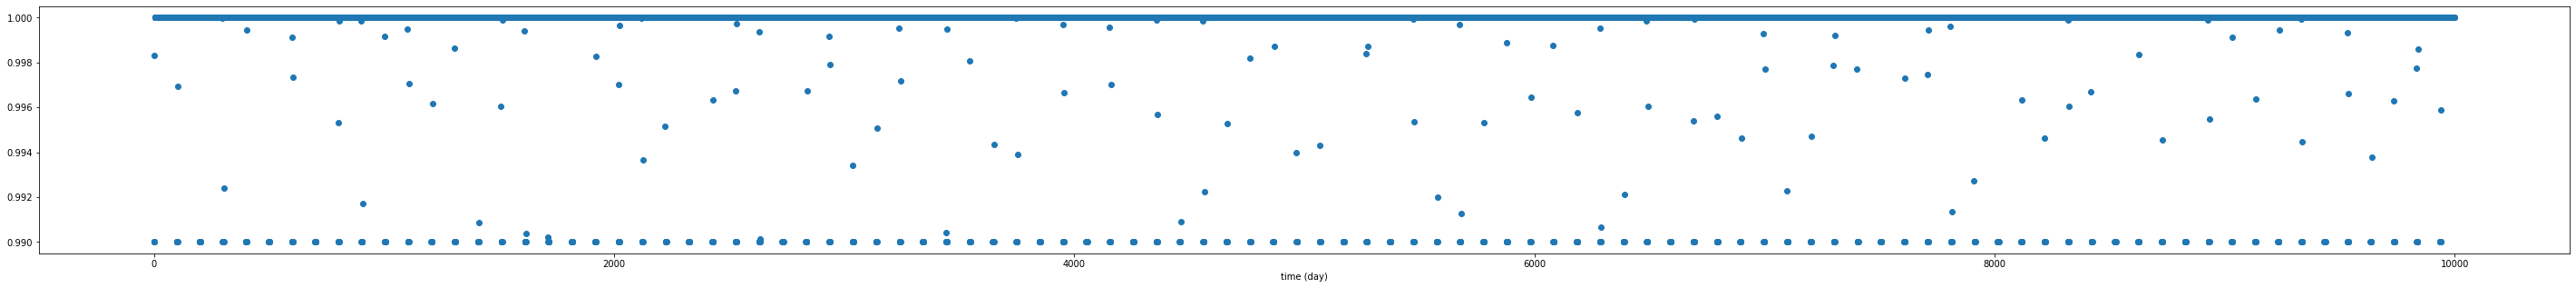

In [34]:
fig = plt.figure(figsize=(50,5))
#plt.scatter(record_time*365.24, K1) # when k1 is between [0,1], and x1-x0 > 0, 
                                 # being transit. 0 corresponsing to transit center
plt.scatter(I1, K1)
#plt.scatter(record_time*365.24, K2)
#plt.xlim(0,20)
#plt.plot(record_time*365.24, (X1-X0)/np.max(X1-X0))
plt.xlabel('time (day)')
#plt.ylim(0,1)
plt.show()

10000

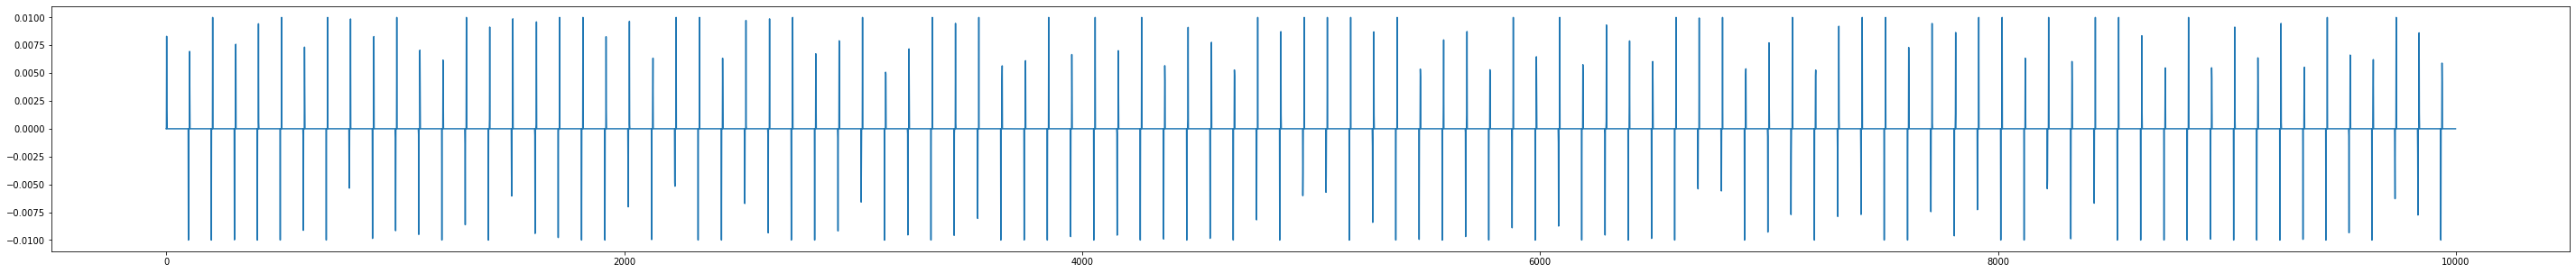

In [35]:
diff = []
fig = plt.figure(figsize=(50,5))
for i in range(0,len(K1)-1):
    d = K1[i+1] - K1[i]
    diff.append(d)
plt.plot(diff)

len(times)

Text(0, 0.5, 'Depth')

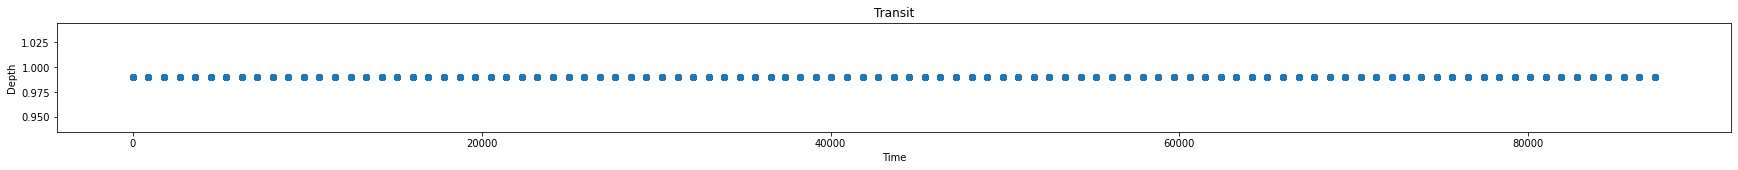

In [37]:
D = []
T = []

for i in range(0,99):
    for j in range(99*i,99*(i+1)):
        K = K1[99*i:99*(i+1)]
        I = I1[99*i:99*(i+1)]
        a = min(K)
        b = K.index(min(K)) + 890*i
        D.append(a)
        T.append(b)
fig = plt.figure(figsize=(30, 2))
axes = fig.add_subplot(111)
axes.scatter(T,D)
plt.title("Transit")
plt.xlabel("Time")
plt.ylabel("Depth")

In [7]:
import numpy as np

(-11.109999120150366,
 11.109999958102398,
 -1.9255235236021266,
 1.9255236197233607)

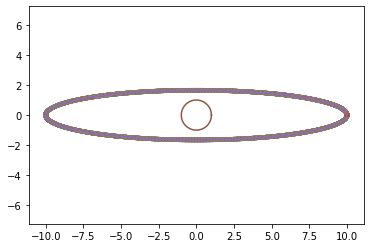

In [8]:
radius = 10.0
r = 0.1
a, b = (0., 0.)
inc = 9.5/180*np.pi
R = 1.0

theta = np.arange(0, 2*np.pi,0.001)
x = a + radius*np.cos(theta)
y = b + radius*np.sin(theta)*np.sin(inc)
x1 = a + R*np.cos(theta)
y1 = b + R*np.sin(theta)
fig = plt.figure()
axes = fig.add_subplot(111)
T = []
for i in range(0, len(theta)):
    x0 = x[i] + r*np.cos(theta)
    y0 = y[i] +r*np.sin(theta)
    axes.plot(x0,y0)
    k = np.sqrt((x[i]-a)**2 + (y[i]-b)**2)
    if k < R - r:
        m = 1. - r**2/R**2
        T.append(m)
    elif k < R + r:
        ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
        ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
        m = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi
        T.append(m)    
    else:
        m = 1.
        T.append(m)




axes.plot(x,y)
axes.plot(x1,y1)


axes.axis('equal')

Text(0, 0.5, 'Depth')

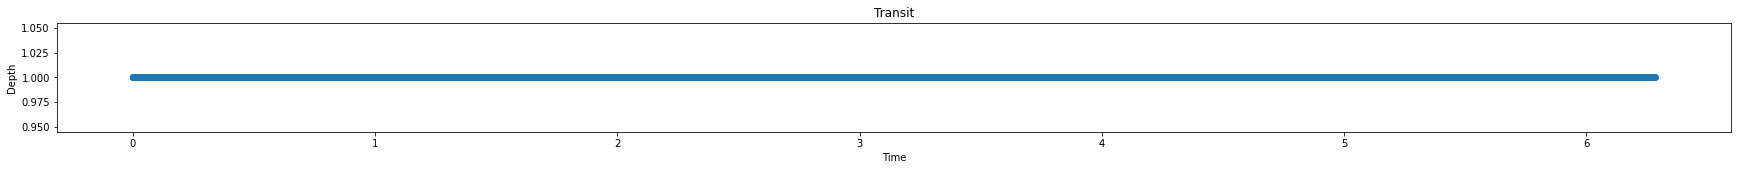

In [9]:

fig = plt.figure(figsize=(30, 2))
axes = fig.add_subplot(111)
axes.scatter(theta,T)
plt.title("Transit")
plt.xlabel("Time")
plt.ylabel("Depth")


---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	Jun 29 2022 01:55:10
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x10bd64dc0, m=0.7 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x10bd64ec0, m=5e-05 x=0.027781409233055013 y=0.0 z=0.0 vx=0.0 vy=31.557846732034086 vz=0.550844263702394>
<rebound.particle.Particle object at 0x10bd64dc0, m=5e-05 x=-0.003544991915924786 y=0.02747248841766554 z=0.0 vx=-31.551669950166993 vy=-4.071385789633504 vz=3.93432086066991e-05>
---------------------------------
period 1 (day) =  2.0256658760595427 0.027820755167564375 0.027781409233055013 31.562653877096714
period 2 (day) =  2.0568138304360266 0.02810522256763042 0.027700263311794336 31.81326859808417
sim_dt =  0.0020256658760595425


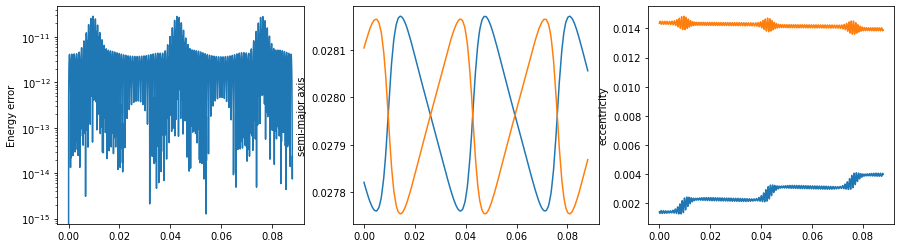

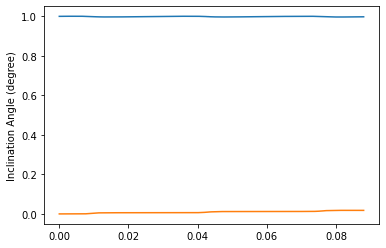

---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	Jun 29 2022 01:55:10
Number of particles: 	3
Selected integrator: 	mercurius
Simulation time:     	5.5300569488555473e-01
Current timestep:    	0.000006
---------------------------------
<rebound.particle.Particle object at 0x10c631ac0, m=0.7 x=-0.0012463278536859333 y=0.0010862922130349464 z=2.1769095279986708e-05 vx=-0.0007878869832722731 vy=-0.0002077331698634318 vz=1.8466970962415324e-06>
<rebound.particle.Particle object at 0x10c631840, m=5e-05 x=0.024809183597284654 y=-0.009022220515724884 z=-0.00014616227143177522 vx=11.367085732868931 vy=29.379567767061484 vz=0.5150991333329598>
<rebound.particle.Particle object at 0x10c631ac0, m=5e-05 x=-0.00023598025983535094 y=0.028573159830064733 z=2.0600192509558973e-05 vx=-31.888337917221655 vy=1.015157553434636 vz=0.009930714230656612>
---------------------------------


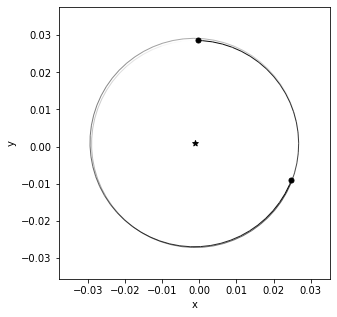

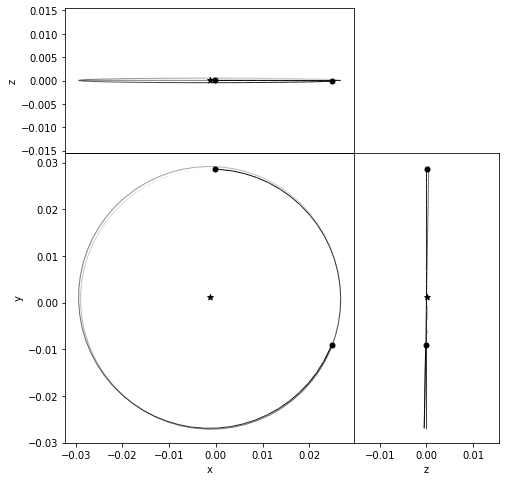

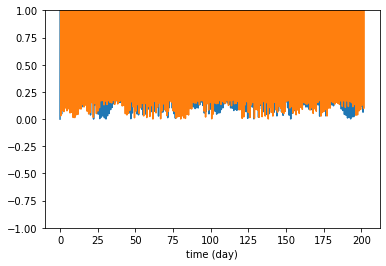

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import rebound 
import random
import matplotlib.pyplot as plt

random.seed(1)

sim = rebound.Simulation()
sim.units = ('Sidereal_yr', 'AU', 'Msun')
#sim.units = ('Yr', 'AU', 'Msun')

radius = 0.005
sim.add(m=0.7, r=radius)


# sim.add(m=0.00001,x=0.027781409233055013, y=0.0, z=0.0, vx=0.0, vy=31.56175213851367, vz=0.0)
# sim.add(m=0.00001, x=0.01389070461652751*1.0, y=0.0240594061487572, z=0.0, vx=-27.333279139900668*1.01, vy=15.780876069256838*0.99, vz=0.0)

sim.add(m=0.00005,a=0.027820755167564368,e=0.0014142655104929561,omega = 0.0, inc = 1/180*np.pi)
sim.add(m=0.00005,a=0.028104204340703643,e=0.01436393703840509,omega = 1.6991961363967472,inc = 0.0)

sim.status()

sim.integrator = "mercurius"
sim.ri_mercurius.hillfac = 3
#sim.dt = min([o.P for o in sim.calculate_orbits()]) * 0.0001 # 5% timestep
sim.dt = min([o.P for o in sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)]) * 0.001 # 5% timestep
#os = sim.calculate_orbits(primary=sim.particles[0])
os = sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)  # set helio-centric orbit
print('period 1 (day) = ', os[0].P*365.24, os[0].a, os[0].d, os[0].v)
print('period 2 (day) = ', os[1].P*365.24, os[1].a, os[1].d, os[1].v)

per = 2.02/365.24
#for o in enumerate(os):
#    print(o)
print('sim_dt = ', sim.dt*365.24)
#sim.ri_mercurius.L = "C4"

#times = np.arange(0, 1, step=0.01)*1*2*np.pi
times = np.arange(0, 100, step=0.01)*1*per   #每个周期记录数据的点的间隔由step决定，如果step=0.01,那么每隔0.01个周期记录一个点
#print(times)
#print(sim.N)
Es = np.zeros(len(times))
As = np.zeros((len(times),sim.N-1))
Eccs = np.zeros((len(times),sim.N-1))
incs = np.zeros((len(times),sim.N-1))
X0 = np.zeros((len(times)))
X1 = np.zeros((len(times)))
X2 = np.zeros((len(times)))
Y0 = np.zeros((len(times)))
Y1 = np.zeros((len(times)))
Y2 = np.zeros((len(times)))
Z0 = np.zeros((len(times)))
Z1 = np.zeros((len(times)))
Z2 = np.zeros((len(times)))
record_time = np.zeros((len(times)))

for j, time in enumerate(times):
    #print(j,time)
    sim.integrate(time)
    Es[j] = sim.calculate_energy()
    os = sim.calculate_orbits()
    record_time[j] =  time
    for i,o in enumerate(os):
        #print(i)
        As[j,i] = o.a
        Eccs[j,i] = o.e
        incs[j,i] = o.inc
        X0[j] = sim.particles[0].x
        Y0[j] = sim.particles[0].y
        Z0[j] = sim.particles[0].z
        X1[j] = sim.particles[1].x
        Y1[j] = sim.particles[1].y
        Z1[j] = sim.particles[1].z
        X2[j] = sim.particles[2].x
        Y2[j] = sim.particles[2].y
        Z2[j] = sim.particles[2].z
#perform_output(sim)

distance1 = ((Y1-Y0)**2.0+(Z1-Z0)**2.0)**0.5
k1 =  distance1/radius

distance2 = ((Y2-Y0)**2.0+(Z2-Z0)**2.0)**0.5
k2 = distance2/radius
      
fig, axs = plt.subplots(1,3,figsize=(15,4))
axs[0].set_yscale("log")
axs[0].set_ylabel("Energy error")
#axs[1].set_ylim([0.01,20])
#axs[1].set_yscale("log")
axs[1].set_ylabel("semi-major axis")
#axs[2].set_ylim([1e-6,1])
axs[0].set_yscale("log")
axs[2].set_ylabel("eccentricity")

axs[0].plot(times/(np.pi*2.),np.abs((Es-Es[0])/Es[0]))
for i in range(As.shape[1]):
    axs[1].plot(times/(np.pi*2.),As[:,i])
    axs[2].plot(times/(np.pi*2.),Eccs[:,i])
    
plt.figure()
for i in range(As.shape[1]):
    plt.plot(times/(np.pi*2.), incs[:,i]/np.pi*180.0)
plt.ylabel('Inclination Angle (degree)')
plt.show()

#fig = rebound.OrbitPlot(sim, xlim=[-1,1],ylim=[-1,1])
fig = rebound.OrbitPlot(sim)

fig = rebound.OrbitPlot(sim,slices=0.5,xlim=[-2.,2],ylim=[-2.,2])
sim.status()
plt.figure()
plt.plot(record_time*365.24, k1) # when k1 is between [0,1], and x1-x0 > 0, 
                                 # being transit. 0 corresponsing to transit center
plt.plot(record_time*365.24, k2)
#plt.plot(record_time*365.24, (X1-X0)/np.max(X1-X0))
plt.xlabel('time (day)')
plt.ylim(-1,1)
plt.show()

plt.figure()
# plt.plot(X2-X0, Y2-Y0)
# plt.plot(X1-X0, Y1-Y0)
#plt.xlabel('time (day)')
#plt.ylim(-1,1)
plt.show()

In [45]:
r = 0.0005 #Planet radius
a, b = (0., 0.) #Stellar position
R = sim.particles[0].r #Orbit radius
inc = 9/180*np.pi #Inclination angle

T1 = [] #Transit1

for i in range(0,len(X1)):
    radius = np.sqrt(X1[i]**2+Y1[i]**2+Z1[i]**2)
    phi = np.arctan(X1[i]/Y1[i])

    x = a + radius*np.cos(phi)
    y = b + radius*np.sin(phi)*np.sin(inc)

    if X1[i] > 0:

        k = np.sqrt((x-a)**2 + (y-b)**2)
        if k < R - r:
            m = 1. - r**2/R**2
            T1.append(m)
        elif k < R + r:
            ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
            ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
            m = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi
            T1.append(m)    
        else:
            m = 1.
            T1.append(m)
    else:
        m = 1
        T1.append(m)


/var/folders/4g/jskm2hn143v97kbtf2dmm1dc0000gn/T/ipykernel_58030/4044903853.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  phi = np.arctan(X1[i]/Y1[i])


In [46]:
T2 = [] #Transit2

for i in range(0,len(X2)):
    radius = np.sqrt(X2[i]**2+Y2[i]**2+Z2[i]**2)
    phi = np.arctan(X2[i]/Y2[i])

    x = a + radius*np.cos(phi)
    y = b + radius*np.sin(phi)*np.sin(inc)

    if X2[i] > 0:

        k = np.sqrt((x-a)**2 + (y-b)**2)
        if k < R - r:
            m = 1. - r**2/R**2
            T2.append(m)
        elif k < R + r:
            ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
            ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
            m = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi
            T2.append(m)    
        else:
            m = 1.
            T2.append(m)
    else:
        m = 1
        T2.append(m)


In [47]:
T3 = []
for i in range(0,len(times)):
    k = T1[i]+T2[i]-1
    T3.append(k)
    

Text(0, 0.5, 'Depth')

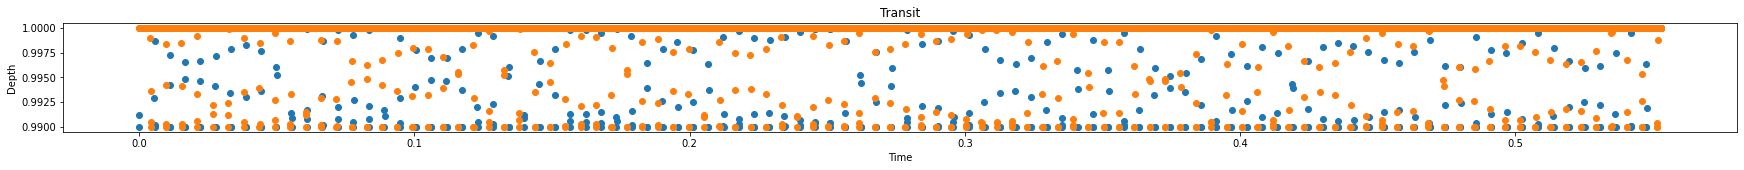

In [48]:
fig = plt.figure(figsize=(30, 2))
axes = fig.add_subplot(111)
axes.scatter(times,T1)
axes.scatter(times,T2)
plt.title("Transit")
plt.xlabel("Time")
plt.ylabel("Depth")

Text(0, 0.5, 'Depth')

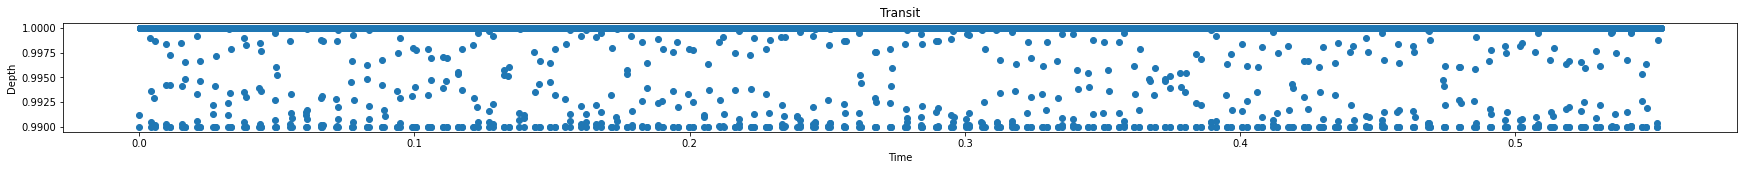

In [49]:
fig = plt.figure(figsize=(30, 2))
axes = fig.add_subplot(111)
axes.scatter(times,T3)
#axes.scatter(times,T2)
plt.title("Transit")
plt.xlabel("Time")
plt.ylabel("Depth")

Text(0, 0.5, 'Depth')

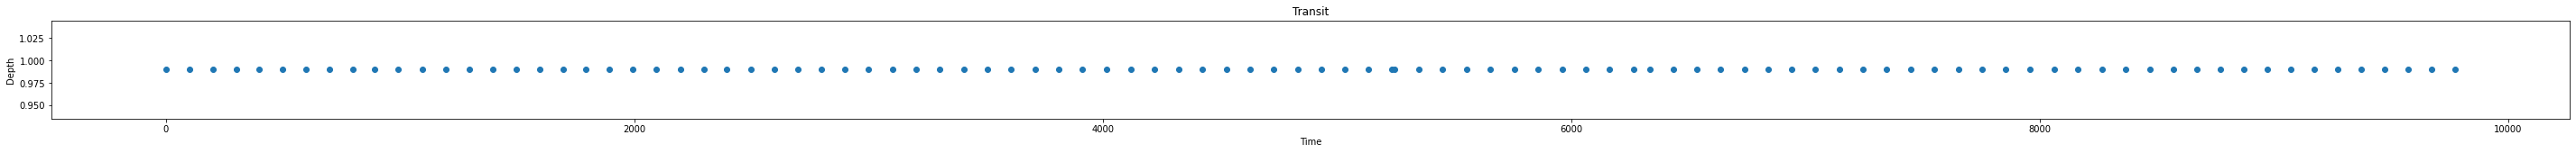

In [54]:
t = []
D = []
for i in range(0,99):
    K = T3[99*i:99*(i+1)]
    I = times[99*i:99*(i+1)]
    a = min(K)
    b = K.index(min(K)) + 99*i
    D.append(a)
    t.append(b)

fig = plt.figure(figsize=(50, 2))
axes = fig.add_subplot(111)
axes.scatter(t,D)
plt.title("Transit")
plt.xlabel("Time")
plt.ylabel("Depth")
#plt.ylim(0.98996,0.99004)

Text(0, 0.5, 'Depth')

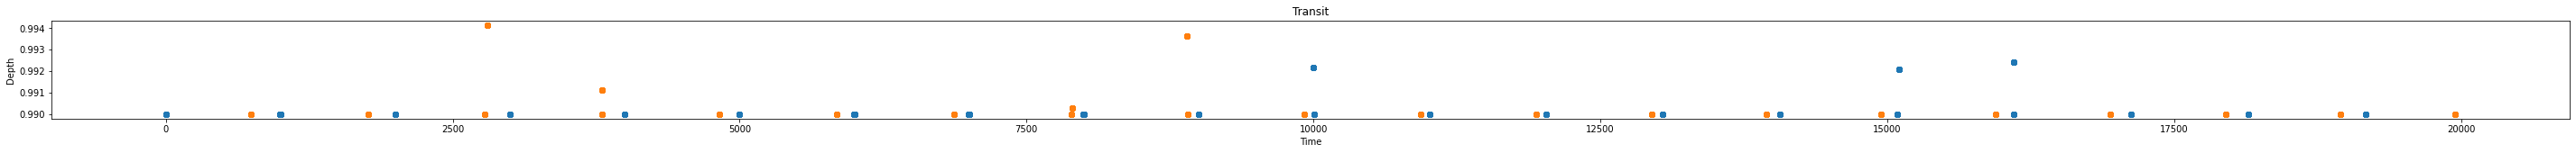

In [17]:
t1 = []
D1 = []
for i in range(0,200):
    for j in range(100*i,100*(i+1)):
        K = T1[100*i:100*(i+1)]
        I = times[100*i:100*(i+1)]
        a = min(K)
        b = K.index(min(K)) + 100*i
        if a < 1.:
            D1.append(a)
            t1.append(b)

t2 = []
D2 = []
for i in range(0,200):
    for j in range(100*i,100*(i+1)):
        K = T2[100*i:100*(i+1)]
        I = times[100*i:100*(i+1)]
        a = min(K)
        b = K.index(min(K)) + 100*i
        if a < 1.:
            D2.append(a)
            t2.append(b)

fig = plt.figure(figsize=(50, 2))
axes = fig.add_subplot(111)
axes.scatter(t1,D1)
axes.scatter(t2,D2)
plt.title("Transit")
plt.xlabel("Time")
plt.ylabel("Depth")
#plt.ylim(0.98996,0.99004)

In [18]:
T4 = []
t4 = []

for i in range(0,len(X1)):
    radius1 = np.sqrt(X1[i]**2+Y1[i]**2+Z1[i]**2)
    phi1 = np.arctan(X1[i]/Y1[i])

    x1 = a + radius1*np.cos(phi1)
    y1 = b + radius1*np.sin(phi1)*np.sin(inc)

    radius2 = np.sqrt(X2[i]**2+Y2[i]**2+Z2[i]**2)
    phi2 = np.arctan(X2[i]/Y2[i])

    x2 = a + radius2*np.cos(phi2)
    y2 = b + radius2*np.sin(phi2)*np.sin(inc)

    k1 = np.sqrt((x1-a)**2 + (y1-b)**2)
    k2 = np.sqrt((x2-a)**2 + (y2-b)**2)

    if X1[i] > 0:

        
        if k1 < R - r:
            if X2[i] > 0:

                
                if k2 < R - r:
                    m2 = 1. - r**2/R**2

                elif k2 < R + r:
                    ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
                    ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
                    m2 = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi

                else:
                    m2 = 1.
                    
            else:
                m2 = 1
                
            m1 = 1. - r**2/R**2
            m = m1 + m2 - 1

            T4.append(m)
            t4.append(i)
        elif k2 < R + r:
            ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
            ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
            if X2[i] > 0:

                
                if k2 < R - r:
                    m2 = 1. - r**2/R**2

                elif k2 < R + r:
                    ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
                    ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
                    m2 = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi

                else:
                    m2 = 1.
                    
            else:
                m2 = 1
                
            m1 = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi
            m = m1 + m2 - 1
            T4.append(m)
            t4.append(i)
               
        else:
            m1 = 1.
            if X2[i] > 0:

                
                if k < R - r:
                    m2 = 1. - r**2/R**2

                elif k2 < R + r:
                    ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
                    ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
                    m2 = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi

                else:
                    m2 = 1.
                    
            else:
                m2 = 1
                
            m = m1 + m2 - 1
            T4.append(m)
            t4.append(i)
    else:
        m1 = 1
        if X2[i] > 0:

           
            if k2 < R - r:
                m2 = 1. - r**2/R**2

            elif k2 < R + r:
                ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
                ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
                m2 = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi

            else:
                m2 = 1.
                    
        else:
            m2 = 1
                
        m1 = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi
        m = m1 + m2 - 1
        T4.append(m)
        t4.append(i)

T2 = [] #Transit2

for i in range(0,len(X2)):
    radius = np.sqrt(X2[i]**2+Y2[i]**2+Z2[i]**2)
    phi = np.arctan(X2[i]/Y2[i])

    x = a + radius*np.cos(phi)
    y = b + radius*np.sin(phi)*np.sin(inc)

    if X2[i] > 0:

        k = np.sqrt((x-a)**2 + (y-b)**2)
        if k < R - r:
            m = 1. - r**2/R**2
            T2.append(m)
        elif k < R + r:
            ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
            ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
            m = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi
            T2.append(m)    
        else:
            m = 1.
            T2.append(m)
    else:
        m = 1
        T2.append(m)



/var/folders/4g/jskm2hn143v97kbtf2dmm1dc0000gn/T/ipykernel_58030/4189763215.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  phi1 = np.arctan(X1[i]/Y1[i])
/var/folders/4g/jskm2hn143v97kbtf2dmm1dc0000gn/T/ipykernel_58030/4189763215.py:47: RuntimeWarning: invalid value encountered in arccos
  ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
/var/folders/4g/jskm2hn143v97kbtf2dmm1dc0000gn/T/ipykernel_58030/4189763215.py:48: RuntimeWarning: invalid value encountered in arccos
  ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
/var/folders/4g/jskm2hn143v97kbtf2dmm1dc0000gn/T/ipykernel_58030/4189763215.py:102: RuntimeWarning: invalid value encountered in arccos
  ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
/var/folders/4g/jskm2hn143v97kbtf2dmm1dc0000gn/T/ipykernel_58030/4189763215.py:103: RuntimeWarning: invalid value encountered in arccos
  ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
/var/folders/4g/jskm2hn143v97kbtf2dmm1dc0000gn/T/ipykernel_58030/4189763215.py:56: RuntimeWarning: inva

Text(0, 0.5, 'Depth')

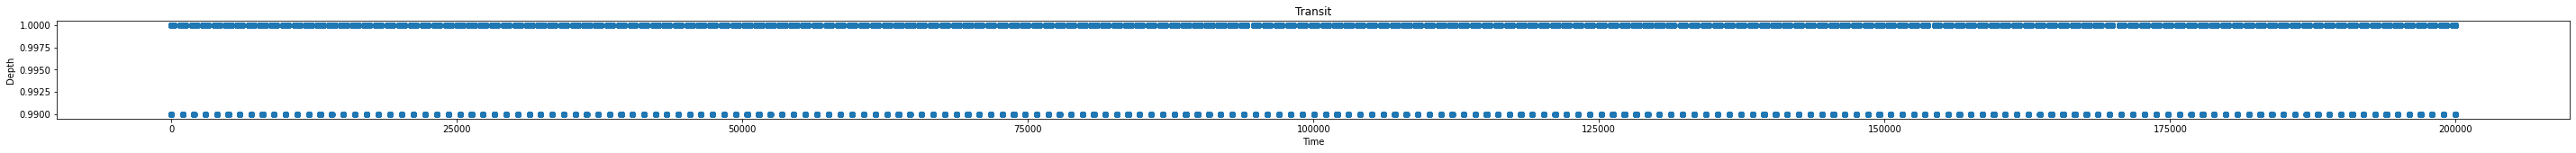

In [19]:
fig = plt.figure(figsize=(50, 2))
axes = fig.add_subplot(111)
axes.scatter(t4,T4)
plt.title("Transit")
plt.xlabel("Time")
plt.ylabel("Depth")

In [20]:
t3 = []
D3 = []
for i in range(0,200):
    for j in range(100*i,100*(i+1)):
        K = T4[100*i:100*(i+1)]
        I = times[100*i:100*(i+1)]
        a = min(K)
        b = K.index(min(K)) + 100*i
        if a < 1.:

            D3.append(a)
            t3.append(b)

(0.98996, 0.99004)

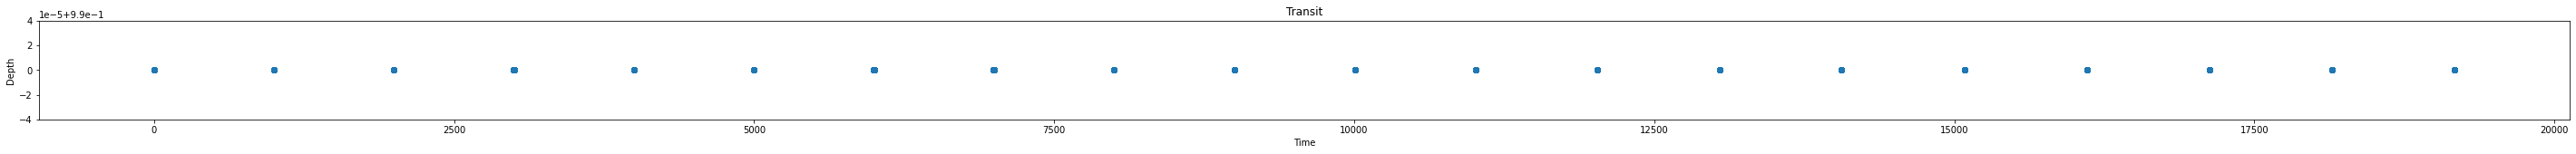

In [21]:
fig = plt.figure(figsize=(50, 2))
axes = fig.add_subplot(111)
axes.scatter(t3,D3)

plt.title("Transit")
plt.xlabel("Time")
plt.ylabel("Depth")
plt.ylim(0.98996,0.99004)

---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	Jun 29 2022 01:55:10
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x168b31140, m=0.7 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x168b31940, m=5e-05 x=0.027781409233055013 y=0.0 z=0.0 vx=0.0 vy=31.557846732034086 vz=0.550844263702394>
<rebound.particle.Particle object at 0x168b31140, m=5e-05 x=-0.003544991915924786 y=0.02747248841766554 z=0.0 vx=-31.551669950166993 vy=-4.071385789633504 vz=3.93432086066991e-05>
---------------------------------
period 1 (day) =  2.0256658760595427 0.027820755167564375 0.027781409233055013 31.562653877096714
period 2 (day) =  2.0568138304360266 0.02810522256763042 0.027700263311794336 31.81326859808417
sim_dt =  0.0020256658760595425


In [2]:

import numpy as np
import rebound 
import random
import matplotlib.pyplot as plt

random.seed(1)

sim = rebound.Simulation()
sim.units = ('Sidereal_yr', 'AU', 'Msun')
#sim.units = ('Yr', 'AU', 'Msun')

radius = 0.005
sim.add(m=0.7, r=radius)


# sim.add(m=0.00001,x=0.027781409233055013, y=0.0, z=0.0, vx=0.0, vy=31.56175213851367, vz=0.0)
# sim.add(m=0.00001, x=0.01389070461652751*1.0, y=0.0240594061487572, z=0.0, vx=-27.333279139900668*1.01, vy=15.780876069256838*0.99, vz=0.0)

sim.add(m=0.00005,a=0.027820755167564368,e=0.0014142655104929561,omega = 0.0, inc = 1/180*np.pi)
sim.add(m=0.00005,a=0.028104204340703643,e=0.01436393703840509,omega = 1.6991961363967472,inc = 0.0)

#sim.status()

sim.integrator = "mercurius"
sim.ri_mercurius.hillfac = 3
#sim.dt = min([o.P for o in sim.calculate_orbits()]) * 0.0001 # 5% timestep
sim.dt = min([o.P for o in sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)]) * 0.001 # 5% timestep
#os = sim.calculate_orbits(primary=sim.particles[0])
os = sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)  # set helio-centric orbit
#print('period 1 (day) = ', os[0].P*365.24, os[0].a, os[0].d, os[0].v)
#print('period 2 (day) = ', os[1].P*365.24, os[1].a, os[1].d, os[1].v)

per = 2.02/365.24
#for o in enumerate(os):
#    print(o)
#print('sim_dt = ', sim.dt*365.24)
#sim.ri_mercurius.L = "C4"

#times = np.arange(0, 1, step=0.01)*1*2*np.pi
times = np.arange(0, 100, step=0.01)*1*per   #每个周期记录数据的点的间隔由step决定，如果step=0.01,那么每隔0.01个周期记录一个点
#print(times)
#print(sim.N)
Es = np.zeros(len(times))
As = np.zeros((len(times),sim.N-1))
Eccs = np.zeros((len(times),sim.N-1))
incs = np.zeros((len(times),sim.N-1))
X0 = np.zeros((len(times)))
X1 = np.zeros((len(times)))
X2 = np.zeros((len(times)))
Y0 = np.zeros((len(times)))
Y1 = np.zeros((len(times)))
Y2 = np.zeros((len(times)))
Z0 = np.zeros((len(times)))
Z1 = np.zeros((len(times)))
Z2 = np.zeros((len(times)))
record_time = np.zeros((len(times)))

for j, time in enumerate(times):
    #print(j,time)
    sim.integrate(time)
    Es[j] = sim.calculate_energy()
    os = sim.calculate_orbits()
    record_time[j] =  time
    for i,o in enumerate(os):
        #print(i)
        As[j,i] = o.a
        Eccs[j,i] = o.e
        incs[j,i] = o.inc
        X0[j] = sim.particles[0].x
        Y0[j] = sim.particles[0].y
        Z0[j] = sim.particles[0].z
        X1[j] = sim.particles[1].x
        Y1[j] = sim.particles[1].y
        Z1[j] = sim.particles[1].z
        X2[j] = sim.particles[2].x
        Y2[j] = sim.particles[2].y
        Z2[j] = sim.particles[2].z
#perform_output(sim)

distance1 = ((Y1-Y0)**2.0+(Z1-Z0)**2.0)**0.5
k1 =  distance1/radius

distance2 = ((Y2-Y0)**2.0+(Z2-Z0)**2.0)**0.5
k2 = distance2/radius

for j in range(-15,15):
    
    r = 0.0005 #Planet radius
    a, b = (0., 0.) #Stellar position
    R = sim.particles[0].r #Orbit radius
    inc = j/180*np.pi #Inclination angle

    T1 = [] #Transit1

    for i in range(0,len(X1)):
        radius = np.sqrt(X1[i]**2+Y1[i]**2+Z1[i]**2)
        phi = np.arctan(X1[i]/Y1[i])

        x = a + radius*np.cos(phi)
        y = b + radius*np.sin(phi)*np.sin(inc)

        if X1[i] > 0:

            k = np.sqrt((x-a)**2 + (y-b)**2)
            if k < R - r:
                m = 1. - r**2/R**2
                T1.append(m)
            elif k < R + r:
                ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
                ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
                m = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi
                T1.append(m)    
            else:
                m = 1.
                T1.append(m)
        else:
            m = 1
            T1.append(m)

    T2 = [] #Transit2

    for i in range(0,len(X2)):
        radius = np.sqrt(X2[i]**2+Y2[i]**2+Z2[i]**2)
        phi = np.arctan(X2[i]/Y2[i])

        x = a + radius*np.cos(phi)
        y = b + radius*np.sin(phi)*np.sin(inc)

        if X2[i] > 0:

            k = np.sqrt((x-a)**2 + (y-b)**2)
            if k < R - r:
                m = 1. - r**2/R**2
                T2.append(m)
            elif k < R + r:
                ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
                ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
                m = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi
                T2.append(m)    
            else:
                m = 1.
                T2.append(m)
        else:
            m = 1
            T2.append(m)

    T3 = []
    for i in range(0,len(times)):
        k = T1[i]+T2[i]-1
        T3.append(k)

    t = []
    D = []
    for i in range(0,99):
        K = T3[99*i:99*(i+1)]
        I = times[99*i:99*(i+1)]
        a = min(K)
        b = K.index(min(K)) + 99*i
        D.append(a)
        t.append(b)

        # if K[i] < K[i-1]*0.8:
        #     print('found')

    fig = plt.figure(figsize=(50, 2))
    axes = fig.add_subplot(111)
    axes.scatter(t,D)
    plt.title(j)
    plt.xlabel("Time")
    plt.ylabel("Depth")
    #print(j)
    #plt.ylim(0.98996,0.99004)

/var/folders/4g/jskm2hn143v97kbtf2dmm1dc0000gn/T/ipykernel_33737/562951178.py:97: RuntimeWarning: divide by zero encountered in double_scalars
  phi = np.arctan(X1[i]/Y1[i])
/var/folders/4g/jskm2hn143v97kbtf2dmm1dc0000gn/T/ipykernel_33737/562951178.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(50, 2))


In [3]:

import numpy as np
import rebound 
import random
import matplotlib.pyplot as plt


random.seed(1)

sim = rebound.Simulation()
sim.units = ('Sidereal_yr', 'AU', 'Msun')
#sim.units = ('Yr', 'AU', 'Msun')

radius = 0.005
sim.add(m=0.7, r=radius)


# sim.add(m=0.00001,x=0.027781409233055013, y=0.0, z=0.0, vx=0.0, vy=31.56175213851367, vz=0.0)
# sim.add(m=0.00001, x=0.01389070461652751*1.0, y=0.0240594061487572, z=0.0, vx=-27.333279139900668*1.01, vy=15.780876069256838*0.99, vz=0.0)

sim.add(m=0.00005,a=0.027820755167564368,e=0.0014142655104929561,omega = 0.0, inc = 1/180*np.pi)
sim.add(m=0.00005,a=0.028104204340703643,e=0.01436393703840509,omega = 1.6991961363967472,inc = 0.0)

#sim.status()

sim.integrator = "mercurius"
sim.ri_mercurius.hillfac = 3
#sim.dt = min([o.P for o in sim.calculate_orbits()]) * 0.0001 # 5% timestep
sim.dt = min([o.P for o in sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)]) * 0.001 # 5% timestep
#os = sim.calculate_orbits(primary=sim.particles[0])
os = sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)  # set helio-centric orbit
#print('period 1 (day) = ', os[0].P*365.24, os[0].a, os[0].d, os[0].v)
#print('period 2 (day) = ', os[1].P*365.24, os[1].a, os[1].d, os[1].v)

per = 2.02/365.24
#for o in enumerate(os):
#    print(o)
#print('sim_dt = ', sim.dt*365.24)
#sim.ri_mercurius.L = "C4"

#times = np.arange(0, 1, step=0.01)*1*2*np.pi
times = np.arange(0, 200, step=0.01)*1*per   #每个周期记录数据的点的间隔由step决定，如果step=0.01,那么每隔0.01个周期记录一个点
#print(times)
#print(sim.N)
Es = np.zeros(len(times))
As = np.zeros((len(times),sim.N-1))
Eccs = np.zeros((len(times),sim.N-1))
incs = np.zeros((len(times),sim.N-1))
X0 = np.zeros((len(times)))
X1 = np.zeros((len(times)))
X2 = np.zeros((len(times)))
Y0 = np.zeros((len(times)))
Y1 = np.zeros((len(times)))
Y2 = np.zeros((len(times)))
Z0 = np.zeros((len(times)))
Z1 = np.zeros((len(times)))
Z2 = np.zeros((len(times)))
M = np.zeros((len(times)))
record_time = np.zeros((len(times)))
#sim.init_megno()

for j, time in enumerate(times):
    #print(j,time)
    sim.integrate(time)
    Es[j] = sim.calculate_energy()
    os = sim.calculate_orbits()
    #megno = sim.calculate_megno()
    record_time[j] =  time
    for i,o in enumerate(os):
        #print(i)
        As[j,i] = o.a
        Eccs[j,i] = o.e
        incs[j,i] = o.inc
        X0[j] = sim.particles[0].x
        Y0[j] = sim.particles[0].y
        Z0[j] = sim.particles[0].z
        X1[j] = sim.particles[1].x
        Y1[j] = sim.particles[1].y
        Z1[j] = sim.particles[1].z
        X2[j] = sim.particles[2].x
        Y2[j] = sim.particles[2].y
        Z2[j] = sim.particles[2].z
        #M[j] = megno
#perform_output(sim)

distance1 = ((Y1-Y0)**2.0+(Z1-Z0)**2.0)**0.5
k1 =  distance1/radius

distance2 = ((Y2-Y0)**2.0+(Z2-Z0)**2.0)**0.5
k2 = distance2/radius
    


/var/folders/4g/jskm2hn143v97kbtf2dmm1dc0000gn/T/ipykernel_46239/3322371680.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  phi = np.arctan(X1[i]/Y1[i])


Text(0, 0.5, 'Depth')

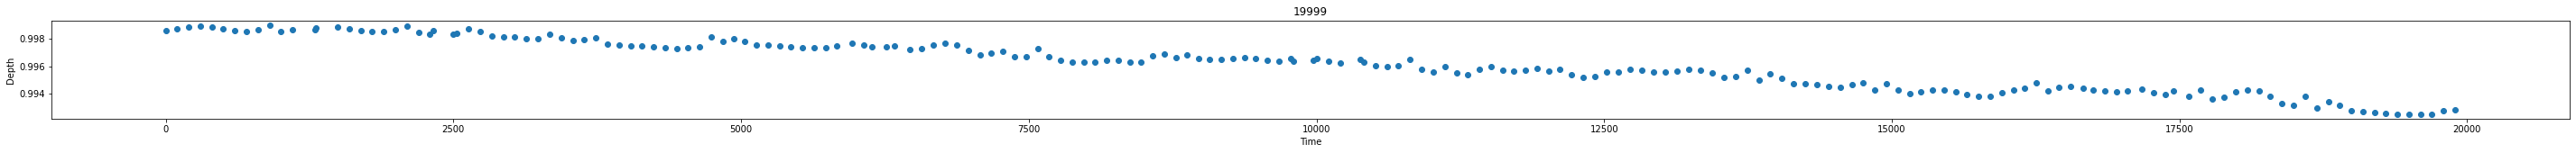

In [3]:
r = 0.0005 #Planet radius
a, b = (0., 0.) #Stellar position
R = sim.particles[0].r #Orbit radius
inc = 11/180*np.pi #Inclination angle

T1 = [] #Transit1

for i in range(0,len(X1)):
    radius = np.sqrt(X1[i]**2+Y1[i]**2+Z1[i]**2)
    phi = np.arctan(X1[i]/Y1[i])

    x = a + radius*np.cos(phi)
    y = b + radius*np.sin(phi)*np.sin(inc)

    if X1[i] > 0:

        k = np.sqrt((x-a)**2 + (y-b)**2)
        if k < R - r:
            m = 1. - r**2/R**2
            T1.append(m)
        elif k < R + r:
            ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
            ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
            m = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi
            T1.append(m)    
        else:
            m = 1.
            T1.append(m)
    else:
        m = 1
        T1.append(m)

T2 = [] #Transit2

for i in range(0,len(X2)):
    radius = np.sqrt(X2[i]**2+Y2[i]**2+Z2[i]**2)
    phi = np.arctan(X2[i]/Y2[i])

    x = a + radius*np.cos(phi)
    y = b + radius*np.sin(phi)*np.sin(inc)

    if X2[i] > 0:

        k = np.sqrt((x-a)**2 + (y-b)**2)
        if k < R - r:
            m = 1. - r**2/R**2
            T2.append(m)
        elif k < R + r:
            ang1 = np.arccos((r**2+k**2-R**2)/(2*r*k))
            ang2 = np.arccos((R**2+k**2-r**2)/(2*R*k))
            m = 1 - (ang1*r*r + ang2*R*R - r*k*np.sin(ang1))/R**2/np.pi
            T2.append(m)    
        else:
            m = 1.
            T2.append(m)
    else:
        m = 1
        T2.append(m)

T3 = []
for i in range(0,len(times)):
    k = T1[i]+T2[i]-1
    T3.append(k)

t = []
D = []
for i in range(0,199):
    K = T3[100*i:100*(i+1)]
    I = times[100*i:100*(i+1)]
    a = min(K)
    b = K.index(min(K)) + 100*i
    D.append(a)
    t.append(b)

    # if K[i] < K[i-1]*0.8:
    #     print('found')

fig = plt.figure(figsize=(50, 2))
axes = fig.add_subplot(111)
axes.scatter(t,D)
plt.title(j)
plt.xlabel("Time")
plt.ylabel("Depth")
#print(j)
#plt.ylim(0.98996,0.99004)

In [5]:
# import spock
# from spock import FeatureClassifier
# fmodel = FeatureClassifier()

# from spock import NbodyRegressor
# nbody = NbodyRegressor()

# from spock import DeepRegressor
# dmodel = DeepRegressor()



# # t_inst, lower, upper = dmodel.predict_instability_time(sim) # instability time in time units used when setting up the Simulation
# # print('Estimated instability time: {0:.1f} orbits of the inner planet. 68% confidence interval = [{1:.0f}, {2:.0f}] orbits.'.format(t_inst/sim.particles[1].P, lower/sim.particles[1].P, upper/sim.particles[1].P))

: 

: 

In [9]:
def simulation1(time):
    sim = rebound.Simulation()
    sim.units = ('Sidereal_yr', 'AU', 'Msun')
    #sim.units = ('Yr', 'AU', 'Msun')

    radius = 0.005
    sim.add(m=0.7, r=radius)


    # sim.add(m=0.00001,x=0.027781409233055013, y=0.0, z=0.0, vx=0.0, vy=31.56175213851367, vz=0.0)
    # sim.add(m=0.00001, x=0.01389070461652751*1.0, y=0.0240594061487572, z=0.0, vx=-27.333279139900668*1.01, vy=15.780876069256838*0.99, vz=0.0)

    sim.add(m=0.00005,a=0.027820755167564368,e=0.0014142655104929561,omega = 0.0, inc = 1/180*np.pi)
    sim.add(m=0.00005,a=0.028104204340703643,e=0.01436393703840509,omega = 1.6991961363967472,inc = 0.0)

    #sim.status()

    # sim.integrator = "mercurius"
    # sim.ri_mercurius.hillfac = 3
    sim.integrator = "whfast"
    sim.ri_whfast.safe_mode = 0
    #sim.dt = min([o.P for o in sim.calculate_orbits()]) * 0.0001 # 5% timestep
    sim.dt = min([o.P for o in sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)]) * 0.001 # 5% timestep
    #os = sim.calculate_orbits(primary=sim.particles[0])
    os = sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)  # set helio-centric orbit
    #print('period 1 (day) = ', os[0].P*365.24, os[0].a, os[0].d, os[0].v)
    #print('period 2 (day) = ', os[1].P*365.24, os[1].a, os[1].d, os[1].v)

    per = 2.02/365.24
    sim.move_to_com()
    
    
    sim.init_megno()
    
    sim.exit_max_distance = 20.
    try:
        sim.integrate(time, exact_finish_time=0) # integrate for 500 years, integrating to the nearest
        #timestep for each output to keep the timestep constant and preserve WHFast's symplectic nature
        megno = sim.calculate_megno()
        #nbody.predict_stable(sim)
        
        return megno
    except rebound.Escape:
        return 10. # At least one particle got ejected, returning large MEGNO.

In [12]:
import rebound
import reboundx
import spock
import numpy as np

from multiprocessing import get_context

pool = get_context("fork").Pool(6)


for i in range(0,len(times)):
    
    results = pool.map(simulation1,times)

    

pool.close()
    # results = simmulation1(times[i])
    # print(results)
    # M[i] = results

Process ForkPoolWorker-40:
Process ForkPoolWorker-41:
Process ForkPoolWorker-38:
Process ForkPoolWorker-42:
Process ForkPoolWorker-39:
Traceback (most recent call last):
Traceback (most recent call last):


KeyboardInterrupt: 

Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/qinzhzh5/miniforge3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Users/qinzhzh5/miniforge3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/qinzhzh5/miniforge3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()


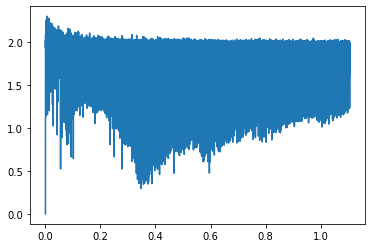

In [14]:
plt.plot(times,M)

---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	Jun 29 2022 01:55:10
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x10c7c24c0, m=0.7 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x10c7c2c40, m=5e-05 x=0.027781409233055013 y=0.0 z=0.0 vx=0.0 vy=31.557846732034086 vz=0.550844263702394>
<rebound.particle.Particle object at 0x10c7c24c0, m=5e-05 x=-0.003544991915924786 y=0.02747248841766554 z=0.0 vx=-31.551669950166993 vy=-4.071385789633504 vz=3.93432086066991e-05>
---------------------------------
period 1 (day) =  2.0256658760595427 0.027820755167564375 0.027781409233055013 31.562653877096714
period 2 (day) =  2.0568138304360266 0.02810522256763042 0.027700263311794336 31.81326859808417
sim_dt =  0.0020256658760595425


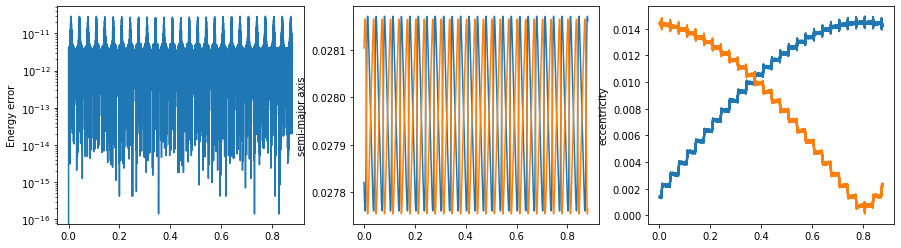

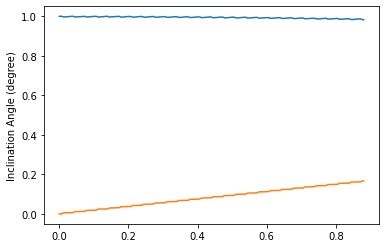

---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	Jun 29 2022 01:55:10
Number of particles: 	3
Selected integrator: 	mercurius
Simulation time:     	5.5305547037564340e+00
Current timestep:    	0.000006
---------------------------------
<rebound.particle.Particle object at 0x10bd64c40, m=0.7 x=-0.012461732479773406 y=0.01086170355376022 z=0.00021762978489271655 vx=-0.005610418591295512 vy=0.0006972956502496429 vz=4.6469891626335134e-05>
<rebound.particle.Particle object at 0x10c7c2cc0, m=5e-05 x=-0.020429861399455435 y=-0.016560251041515858 z=-0.000269063359401729 vx=29.644249870458705 vy=-8.649621898075125 vz=-0.061189441817522894>
<rebound.particle.Particle object at 0x10bd64c40, m=5e-05 x=0.010684335073274305 y=-0.004441158719370756 z=0.00014399827736770305 vx=17.3499404575139 vy=26.373943736990608 vz=-0.03850543404017024>
---------------------------------


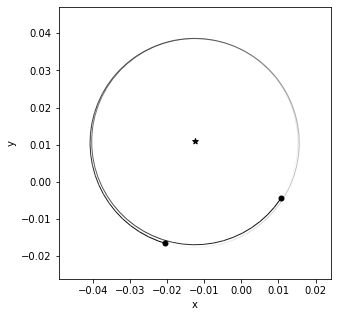

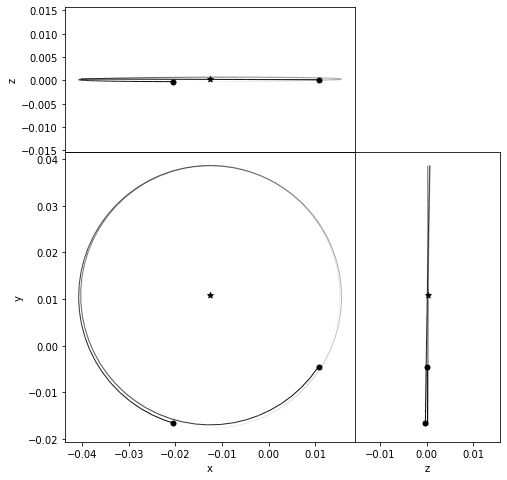

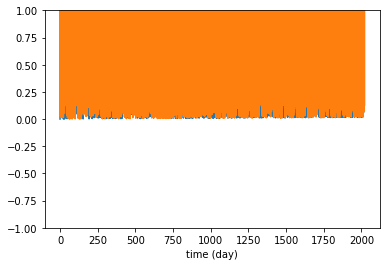

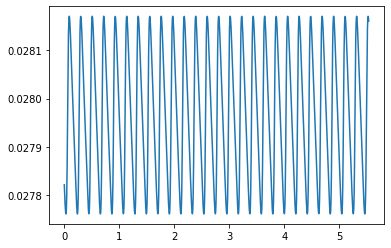

In [5]:
import numpy as np
import rebound 
import random
import matplotlib.pyplot as plt

random.seed(1)

sim = rebound.Simulation()
sim.units = ('Sidereal_yr', 'AU', 'Msun')
#sim.units = ('Yr', 'AU', 'Msun')

radius = 0.005
sim.add(m=0.7, r=radius)


# sim.add(m=0.00001,x=0.027781409233055013, y=0.0, z=0.0, vx=0.0, vy=31.56175213851367, vz=0.0)
# sim.add(m=0.00001, x=0.01389070461652751*1.0, y=0.0240594061487572, z=0.0, vx=-27.333279139900668*1.01, vy=15.780876069256838*0.99, vz=0.0)

sim.add(m=0.00005,a=0.027820755167564368,e=0.0014142655104929561,omega = 0.0, inc = 1/180*np.pi)
sim.add(m=0.00005,a=0.028104204340703643,e=0.01436393703840509,omega = 1.6991961363967472,inc = 0.0)

sim.status()

sim.integrator = "mercurius"
sim.ri_mercurius.hillfac = 3
#sim.dt = min([o.P for o in sim.calculate_orbits()]) * 0.0001 # 5% timestep
sim.dt = min([o.P for o in sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)]) * 0.001 # 5% timestep
#os = sim.calculate_orbits(primary=sim.particles[0])
os = sim.calculate_orbits(primary=sim.particles[0], jacobi_masses= False)  # set helio-centric orbit
print('period 1 (day) = ', os[0].P*365.24, os[0].a, os[0].d, os[0].v)
print('period 2 (day) = ', os[1].P*365.24, os[1].a, os[1].d, os[1].v)

per = 2.02/365.24
#for o in enumerate(os):
#    print(o)
print('sim_dt = ', sim.dt*365.24)
#sim.ri_mercurius.L = "C4"

#times = np.arange(0, 1, step=0.01)*1*2*np.pi
times = np.arange(0, 1000, step=0.01)*1*per   #每个周期记录数据的点的间隔由step决定，如果step=0.01,那么每隔0.01个周期记录一个点
#print(times)
#print(sim.N)
Es = np.zeros(len(times))
As = np.zeros((len(times),sim.N-1))
Eccs = np.zeros((len(times),sim.N-1))
incs = np.zeros((len(times),sim.N-1))
X0 = np.zeros((len(times)))
X1 = np.zeros((len(times)))
X2 = np.zeros((len(times)))
Y0 = np.zeros((len(times)))
Y1 = np.zeros((len(times)))
Y2 = np.zeros((len(times)))
Z0 = np.zeros((len(times)))
Z1 = np.zeros((len(times)))
Z2 = np.zeros((len(times)))
A1 = np.zeros((len(times)))
A2 = np.zeros((len(times)))
E1 = np.zeros((len(times)))
E2 = np.zeros((len(times)))
record_time = np.zeros((len(times)))

for j, time in enumerate(times):
    #print(j,time)
    sim.integrate(time)
    Es[j] = sim.calculate_energy()
    os = sim.calculate_orbits()
    record_time[j] =  time
    for i,o in enumerate(os):
        #print(i)
        As[j,i] = o.a
        Eccs[j,i] = o.e
        incs[j,i] = o.inc
        X0[j] = sim.particles[0].x
        Y0[j] = sim.particles[0].y
        Z0[j] = sim.particles[0].z
        X1[j] = sim.particles[1].x
        Y1[j] = sim.particles[1].y
        Z1[j] = sim.particles[1].z
        A1[j] = sim.particles[1].a
        E1[j] = sim.particles[1].e
        X2[j] = sim.particles[2].x
        Y2[j] = sim.particles[2].y
        Z2[j] = sim.particles[2].z
        A2[j] = sim.particles[2].a
        E2[j] = sim.particles[2].e
#perform_output(sim)

distance1 = ((Y1-Y0)**2.0+(Z1-Z0)**2.0)**0.5
k1 =  distance1/radius

distance2 = ((Y2-Y0)**2.0+(Z2-Z0)**2.0)**0.5
k2 = distance2/radius
      
fig, axs = plt.subplots(1,3,figsize=(15,4))
axs[0].set_yscale("log")
axs[0].set_ylabel("Energy error")
#axs[1].set_ylim([0.01,20])
#axs[1].set_yscale("log")
axs[1].set_ylabel("semi-major axis")
#axs[2].set_ylim([1e-6,1])
axs[0].set_yscale("log")
axs[2].set_ylabel("eccentricity")

axs[0].plot(times/(np.pi*2.),np.abs((Es-Es[0])/Es[0]))
for i in range(As.shape[1]):
    axs[1].plot(times/(np.pi*2.),As[:,i])
    axs[2].plot(times/(np.pi*2.),Eccs[:,i])
    
plt.figure()
for i in range(As.shape[1]):
    plt.plot(times/(np.pi*2.), incs[:,i]/np.pi*180.0)
plt.ylabel('Inclination Angle (degree)')
plt.show()

#fig = rebound.OrbitPlot(sim, xlim=[-1,1],ylim=[-1,1])
fig = rebound.OrbitPlot(sim)

fig = rebound.OrbitPlot(sim,slices=0.5,xlim=[-2.,2],ylim=[-2.,2])
sim.status()
plt.figure()
plt.plot(record_time*365.24, k1) # when k1 is between [0,1], and x1-x0 > 0, 
                                 # being transit. 0 corresponsing to transit center
plt.plot(record_time*365.24, k2)
#plt.plot(record_time*365.24, (X1-X0)/np.max(X1-X0))
plt.xlabel('time (day)')
plt.ylim(-1,1)
plt.show()

plt.figure()
plt.plot(times,A1)
plt.show()